<a href="https://colab.research.google.com/github/ItsMeAbby/DL-Workshop-1/blob/master/MUlticlassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

     |████████████████████████████████| 720 kB 5.2 MB/s 
     |████████████████████████████████| 189 kB 47.7 MB/s 
     |████████████████████████████████| 46 kB 3.7 MB/s 
     |████████████████████████████████| 1.2 MB 27.4 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 51 kB 290 kB/s 
Mounted at /content/gdrive


In [18]:
classes = ['theRock','rock']

In [19]:
path= Path("/content/gdrive/MyDrive/dataset/images")

In [21]:
rocks = DataBlock(
 blocks=(ImageBlock, CategoryBlock),
 get_items=get_image_files,
 splitter=RandomSplitter(valid_pct=0.2, seed=42),
 get_y=parent_label,
 item_tfms=Resize(128))

In [22]:
dls = rocks.dataloaders(path)


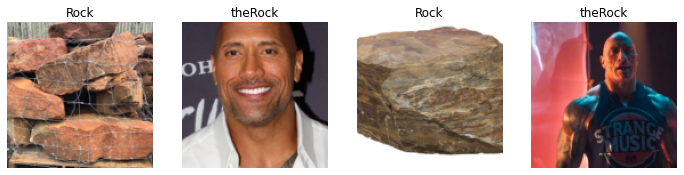

In [23]:
dls.valid.show_batch(max_n=4, nrows=1)

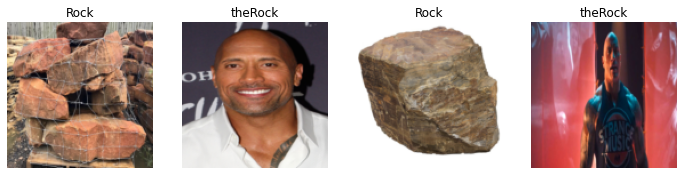

In [24]:
rocks = rocks.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = rocks.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

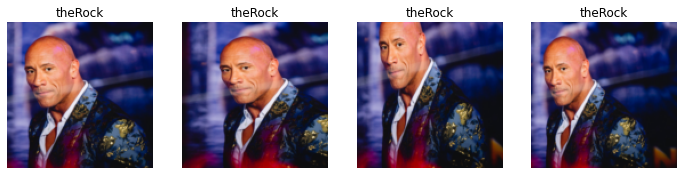

In [25]:
rocks = rocks.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = rocks.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)


In [26]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.245153,0.473090,0.162162,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.462639,0.071452,0.027027,00:06
1,0.325901,0.085384,0.054054,00:06
2,0.262091,0.101019,0.054054,00:06
3,0.209254,0.078811,0.054054,00:07


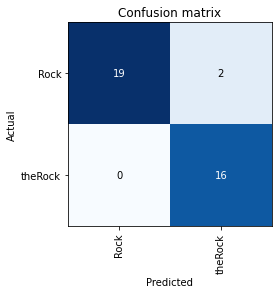

In [28]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


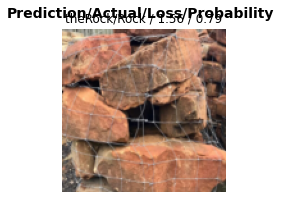

In [32]:
interp.plot_top_losses(1, nrows=1)

In [33]:
learn.export()

In [37]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [35]:
learn_inf = load_learner('/content/export.pkl')

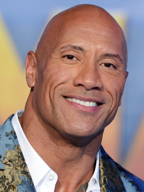

In [39]:
img = PILImage.create(uploader.data[0])
img.to_thumb(192)

In [40]:

learn_inf.predict(img)

('theRock', TensorBase(1), TensorBase([8.7432e-06, 9.9999e-01]))